In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings


warnings. filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
movie = pd.read_csv('movies.csv')
rating = pd.read_csv('ratings.csv')

In [3]:
movie

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
movie_rating = pd.merge(movie,rating,on='movieId')
movie_rating

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483
...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545
100833,193585,Flint (2017),Drama,184,3.5,1537109805
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021


In [6]:
movie_rating_new  =movie_rating.groupby('title')['rating'].count()
movie_rating_count = pd.DataFrame(movie_rating_new)
movie_rating_count.rename(index=str,columns={'title':'Title','rating':'Rating Counts'})

,Rating Counts
title,
'71 (2014),1
'Hellboy': The Seeds of Creation (2004),1
'Round Midnight (1986),2
'Salem's Lot (2004),1
'Til There Was You (1997),2
...,...
eXistenZ (1999),22
xXx (2002),24
xXx: State of the Union (2005),5


In [7]:
total = movie_rating.merge(movie_rating_count,on='title')
total.rename(index=str ,columns={'rating_y':'total_rating_count','rating_x':'star rating'},inplace=True)
total

,movieId,title,genres,userId,star rating,timestamp,total_rating_count
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703,215
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962,215
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946,215
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970,215
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483,215
...,...,...,...,...,...,...,...
100831,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,184,4.0,1537109082,1
100832,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,184,3.5,1537109545,1
100833,193585,Flint (2017),Drama,184,3.5,1537109805,1
100834,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,184,3.5,1537110021,1


Text(0.5, 0, 'total_rating_count')

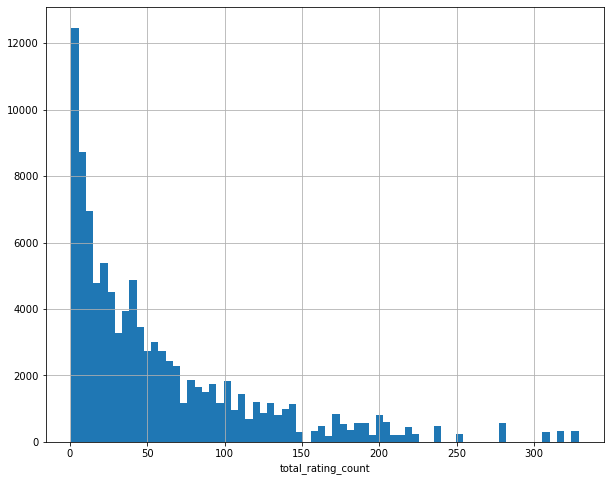

In [8]:
plt.figure(figsize=(10,8))
total['total_rating_count'].hist(bins=70)
plt.xlabel('total_rating_count')

In [9]:
popularity = total[total['total_rating_count']>=80]
popularity.sort_values('total_rating_count',ascending=False).head(20)

,movieId,title,genres,userId,star rating,timestamp,total_rating_count
10344,356,Forrest Gump (1994),Comedy|Drama|Romance|War,606,4.0,1171231370,329
10122,356,Forrest Gump (1994),Comedy|Drama|Romance|War,189,4.0,1439465080,329
10124,356,Forrest Gump (1994),Comedy|Drama|Romance|War,193,3.0,1435856904,329
10125,356,Forrest Gump (1994),Comedy|Drama|Romance|War,197,3.0,947461058,329
10126,356,Forrest Gump (1994),Comedy|Drama|Romance|War,198,5.0,1034134802,329
10127,356,Forrest Gump (1994),Comedy|Drama|Romance|War,199,2.0,940372744,329
10128,356,Forrest Gump (1994),Comedy|Drama|Romance|War,200,4.0,1229886266,329
10129,356,Forrest Gump (1994),Comedy|Drama|Romance|War,201,5.0,939801781,329
10130,356,Forrest Gump (1994),Comedy|Drama|Romance|War,202,5.0,974924053,329
10131,356,Forrest Gump (1994),Comedy|Drama|Romance|War,205,4.0,1519900230,329


In [10]:
features = popularity.pivot_table(index='title',values='star rating',columns='userId' ).fillna(0)
features.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,148,149,150,151,152,153,154,155,156,157,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,577,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001: A Space Odyssey (1968),0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,2.0,3.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,5.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,4.5,5.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,3.5,1.0,0.0,0.0,0.0,1.5,5.0,0.0,0.0,0.0,4.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,0.0

In [11]:
features.shape

(210, 602)

In [12]:
#### converting the pivot table into array

from scipy.sparse import csr_matrix

features_matrix = csr_matrix(features.values)



from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine',algorithm='brute')
knn.fit(features_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [13]:
query = np.random.choice(features.shape[0])  #### getting the random row 
query

91

In [14]:
distance,index = knn.kneighbors(features.iloc[query,:].values.reshape(1,-1),n_neighbors=6)  
#### will find 6 movies that are same as query

In [15]:
distance.flatten() ### gives one dimensional array

array([0.        , 0.48721511, 0.49854577, 0.50119439, 0.52741402,
       0.52924992])

In [16]:
index.flatten()

array([ 91,  13, 138,  65,  18, 101], dtype=int64)

In [17]:
for i in range(0, len(distance.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(features.index[query]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, features.index[index.flatten()[i]], distance.flatten()[i]))

Recommendations for Happy Gilmore (1996):

1: American Pie (1999), with distance of 0.48721511308283727:
2: Nutty Professor, The (1996), with distance of 0.4985457733989128:
3: Dumb & Dumber (Dumb and Dumber) (1994), with distance of 0.5011943873328781:
4: Austin Powers: International Man of Mystery (1997), with distance of 0.5274140183534661:
5: Independence Day (a.k.a. ID4) (1996), with distance of 0.5292499229777519:
